In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn and Matplotlib Integration

This notebook demonstrates how Seaborn integrates with Matplotlib. Seaborn is built on top of Matplotlib and provides a high-level interface for drawing attractive and informative statistical graphics. However, you can still use Matplotlib's functionality to customize Seaborn plots or create complex visualizations that combine both libraries.

In [2]:
# Load the tips dataset from seaborn
df = sns.load_dataset("tips")

# Display the first few rows of the dataset to understand its structure
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Basic Integration: Using Matplotlib with Seaborn

Seaborn functions return Matplotlib axes objects, which allows you to further customize the plots using Matplotlib functions.

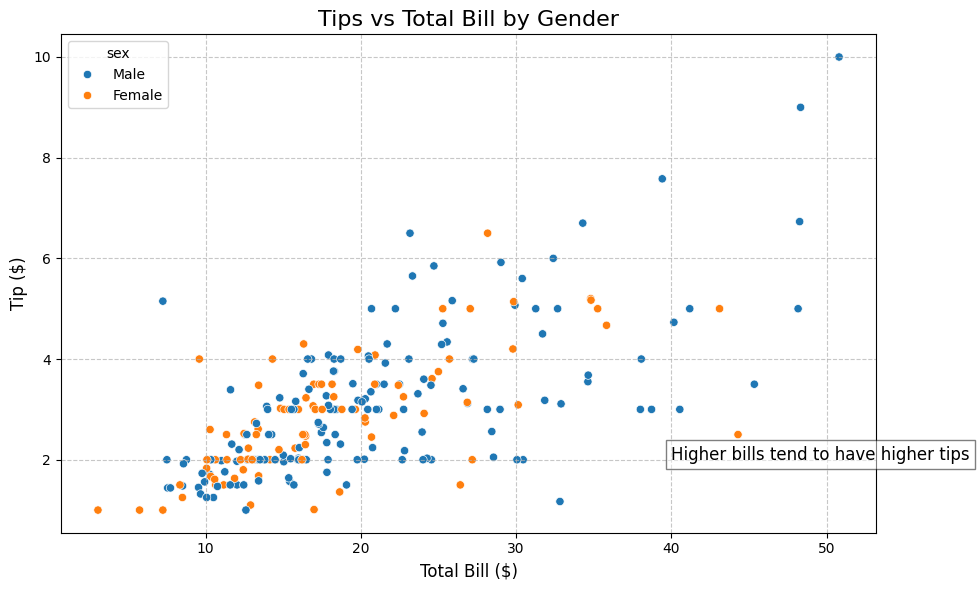

In [5]:
# Create a basic Seaborn plot
plt.figure(figsize=(10, 6))

# Create a scatter plot using Seaborn
ax = sns.scatterplot(data=df, x="total_bill", y="tip", hue="sex")

# Customize the plot using Matplotlib functions
ax.set_title("Tips vs Total Bill by Gender", fontsize=16)
ax.set_xlabel("Total Bill ($)", fontsize=12)
ax.set_ylabel("Tip ($)", fontsize=12)
ax.grid(True, linestyle="--", alpha=0.7)

# Add a text annotation using Matplotlib
ax.text(40, 
        2, 
        "Higher bills tend to have higher tips",
        fontsize=12, 
        bbox=dict(facecolor='white', alpha=0.5)
       )

plt.tight_layout()
plt.show()

## Working with Axes Objects

You can create Matplotlib figure and axes objects first, and then pass the axes to Seaborn functions.

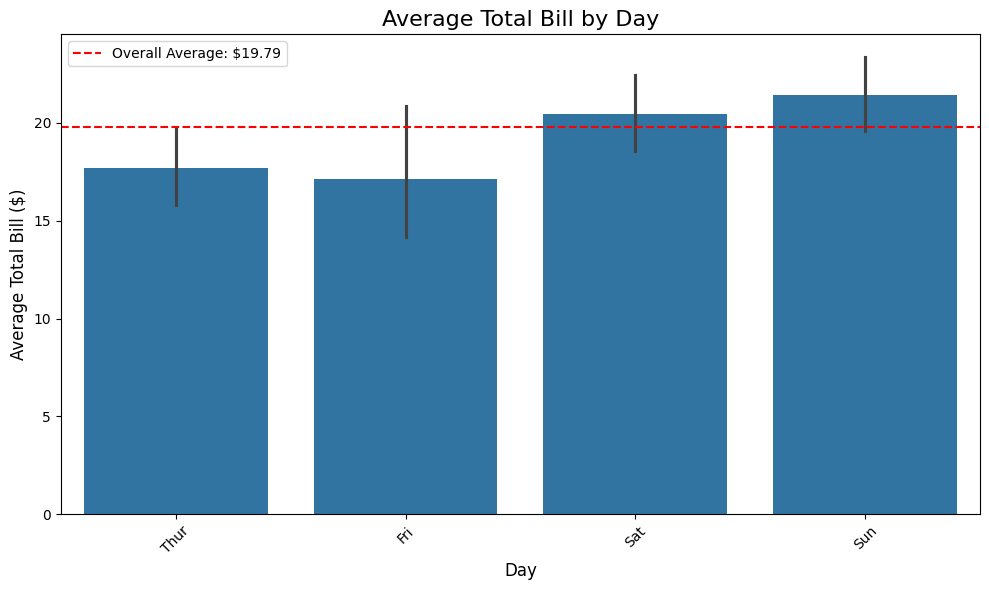

In [6]:
# Create a Matplotlib figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create a Seaborn plot on the axes
sns.barplot(data=df, x="day", y="total_bill", ax=ax)

# Customize the plot using Matplotlib functions
ax.set_title("Average Total Bill by Day", fontsize=16)
ax.set_xlabel("Day", fontsize=12)
ax.set_ylabel("Average Total Bill ($)", fontsize=12)

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add a horizontal line at the overall average
overall_avg = df["total_bill"].mean()
ax.axhline(y=overall_avg, color='r', linestyle='--', label=f"Overall Average: ${overall_avg:.2f}")

# Add a legend
ax.legend()

plt.tight_layout()
plt.show()

## Creating Subplots

You can create multiple subplots using Matplotlib and place Seaborn plots in each subplot.

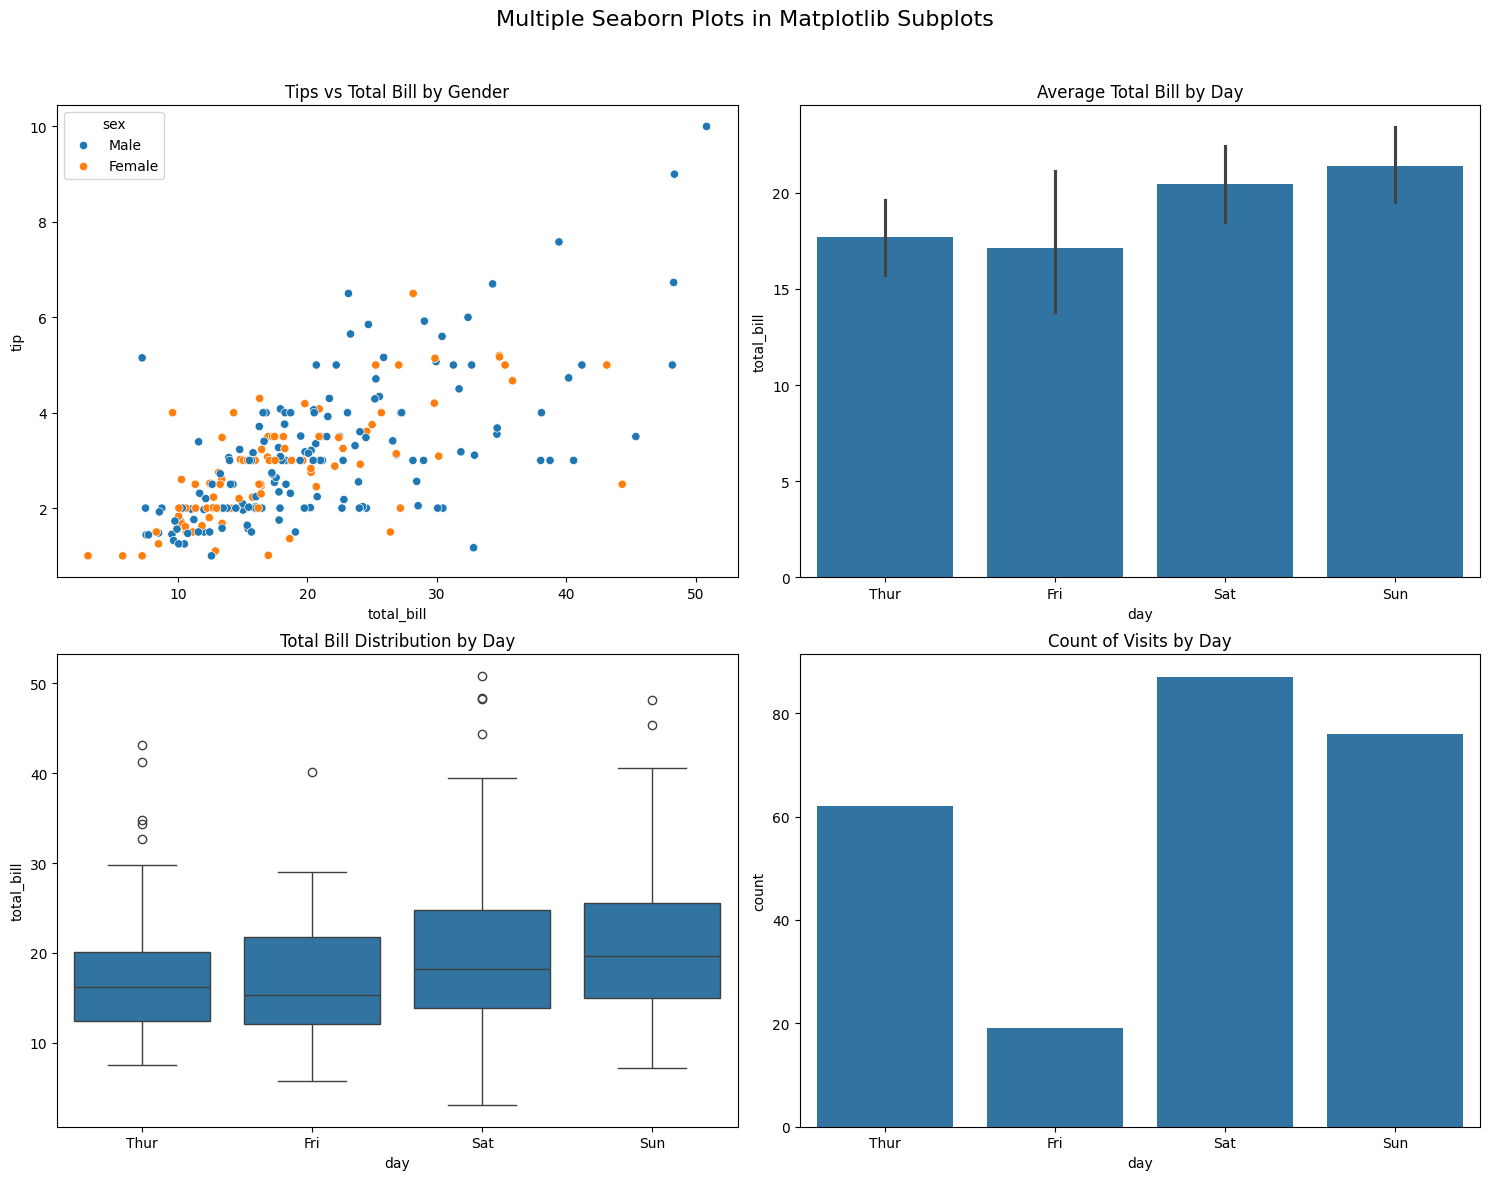

In [7]:
# Create a figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Create different Seaborn plots in each subplot

# Subplot 1: Scatter plot
sns.scatterplot(data=df, x="total_bill", y="tip", hue="sex", ax=axes[0])
axes[0].set_title("Tips vs Total Bill by Gender")

# Subplot 2: Bar plot
sns.barplot(data=df, x="day", y="total_bill", ax=axes[1])
axes[1].set_title("Average Total Bill by Day")

# Subplot 3: Box plot
sns.boxplot(data=df, x="day", y="total_bill", ax=axes[2])
axes[2].set_title("Total Bill Distribution by Day")

# Subplot 4: Count plot
sns.countplot(data=df, x="day", ax=axes[3])
axes[3].set_title("Count of Visits by Day")

# Add a main title to the figure
fig.suptitle("Multiple Seaborn Plots in Matplotlib Subplots", fontsize=16, y=0.98)

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust to make room for the main title
plt.show()

## Using GridSpec for Complex Layouts

For more complex layouts, you can use Matplotlib's GridSpec to create a custom grid of subplots.

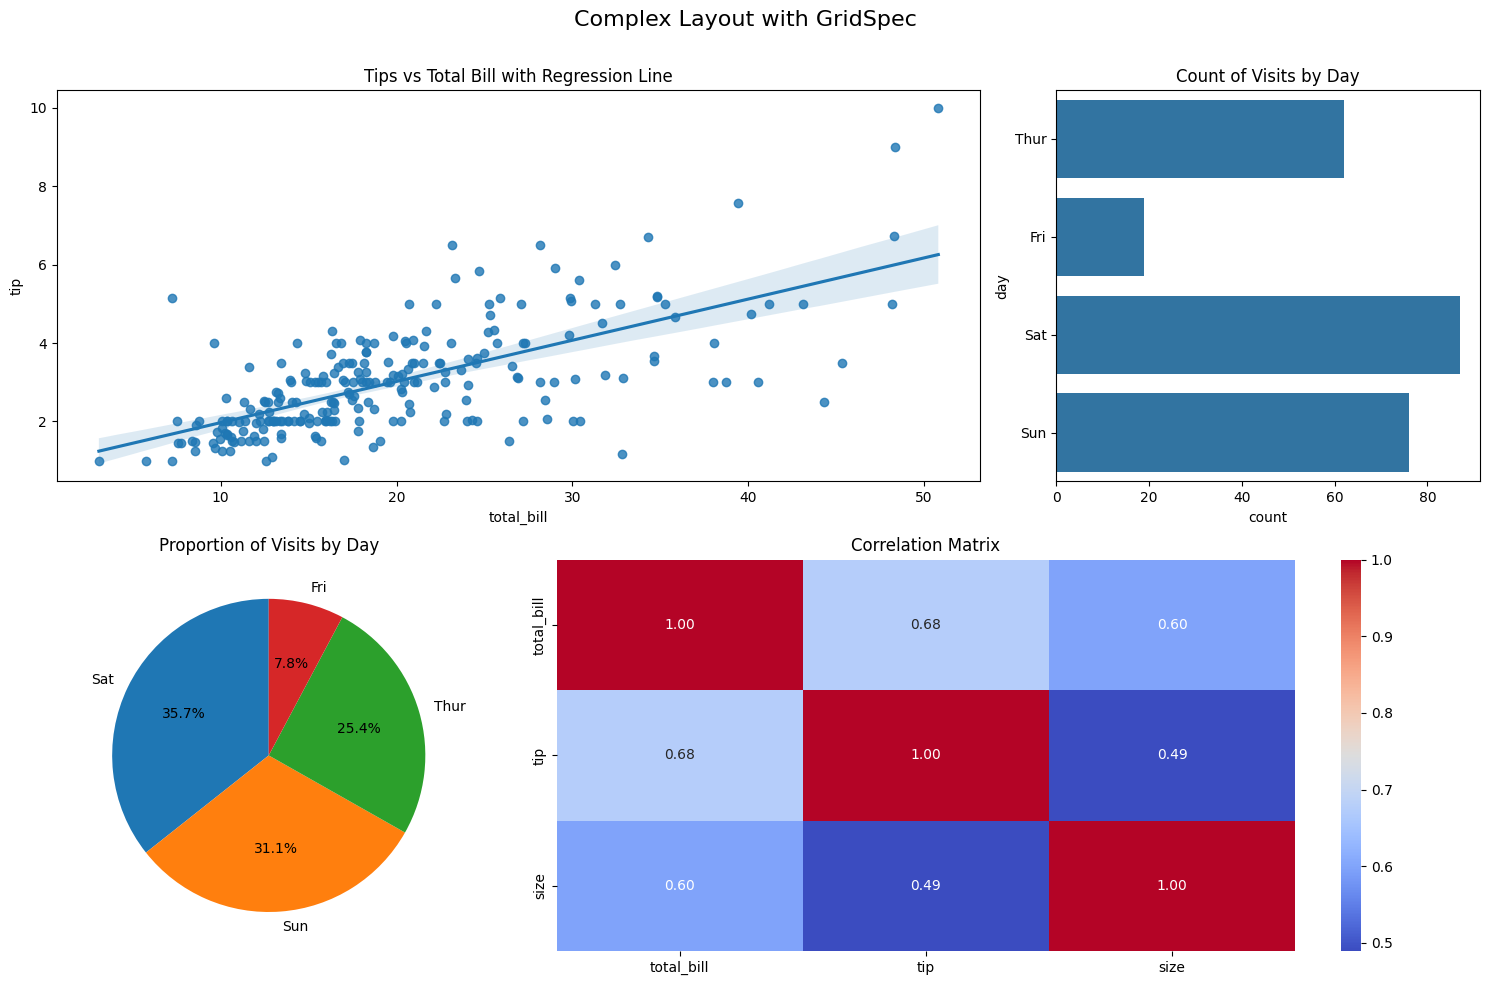

In [8]:
# Create a figure with a custom grid layout
fig = plt.figure(figsize=(15, 10))

# Create a 2x3 grid
gs = fig.add_gridspec(2, 3)

# Create axes with different sizes
ax1 = fig.add_subplot(gs[0, :2])  # Top left, spans 2 columns
ax2 = fig.add_subplot(gs[0, 2])   # Top right, spans 1 column
ax3 = fig.add_subplot(gs[1, 0])   # Bottom left, spans 1 column
ax4 = fig.add_subplot(gs[1, 1:])  # Bottom right, spans 2 columns

# Create different Seaborn plots in each subplot

# Subplot 1: Scatter plot with regression line
sns.regplot(data=df, x="total_bill", y="tip", ax=ax1)
ax1.set_title("Tips vs Total Bill with Regression Line")

# Subplot 2: Count plot
sns.countplot(data=df, y="day", ax=ax2)
ax2.set_title("Count of Visits by Day")

# Subplot 3: Pie chart (using Matplotlib)
day_counts = df["day"].value_counts()
ax3.pie(day_counts, labels=day_counts.index, autopct='%1.1f%%', startangle=90)
ax3.set_title("Proportion of Visits by Day")

# Subplot 4: Heatmap of correlation matrix
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", ax=ax4)
ax4.set_title("Correlation Matrix")

# Add a main title to the figure
fig.suptitle("Complex Layout with GridSpec", fontsize=16, y=0.98)

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust to make room for the main title
plt.show()

## Using FacetGrid for Multi-panel Plots

Seaborn's FacetGrid allows you to create multi-panel plots that show the same relationship conditioned on different variables.

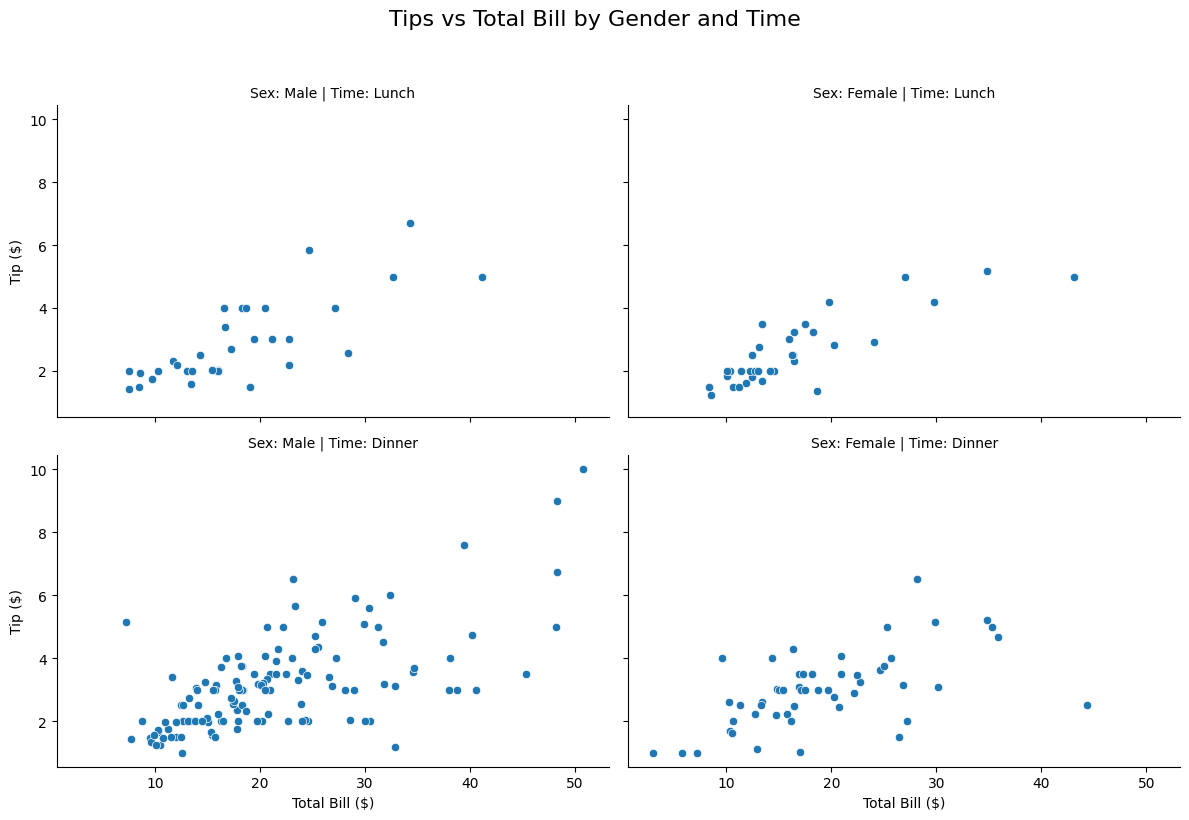

In [9]:
# Create a FacetGrid
g = sns.FacetGrid(df, col="sex", row="time", height=4, aspect=1.5)

# Map a scatter plot to the grid
g.map(sns.scatterplot, "total_bill", "tip")

# Add a title to each subplot
g.set_titles("Sex: {col_name} | Time: {row_name}")

# Add a main title to the figure
g.fig.suptitle("Tips vs Total Bill by Gender and Time", fontsize=16, y=1.02)

# Add axis labels
g.set_axis_labels("Total Bill ($)", "Tip ($)")

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust to make room for the main title
plt.show()

## Using PairGrid for Pairwise Relationships

Seaborn's PairGrid allows you to create a grid of plots showing pairwise relationships between multiple variables.

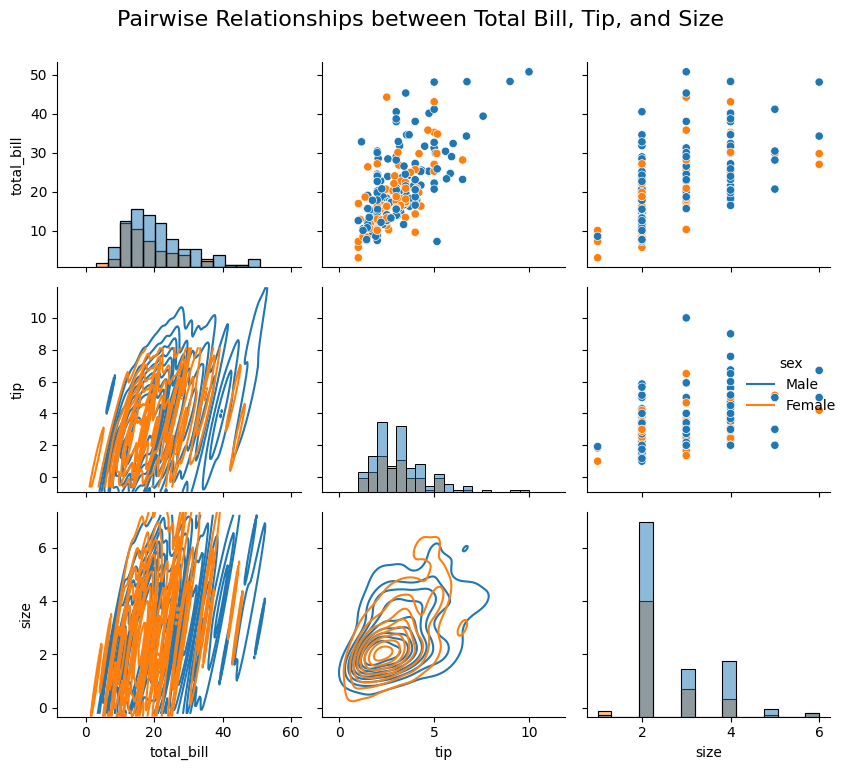

In [10]:
# Create a PairGrid
g = sns.PairGrid(df, vars=["total_bill", "tip", "size"], hue="sex")

# Map different plots to different parts of the grid
g.map_diag(sns.histplot)  # Histogram on the diagonal
g.map_upper(sns.scatterplot)  # Scatter plot on the upper triangle
g.map_lower(sns.kdeplot)  # KDE plot on the lower triangle

# Add a legend
g.add_legend()

# Add a main title to the figure
g.fig.suptitle("Pairwise Relationships between Total Bill, Tip, and Size", fontsize=16, y=1.02)

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust to make room for the main title
plt.show()

## Combining Different Types of Plots

You can combine different types of plots on the same axes to create more informative visualizations.

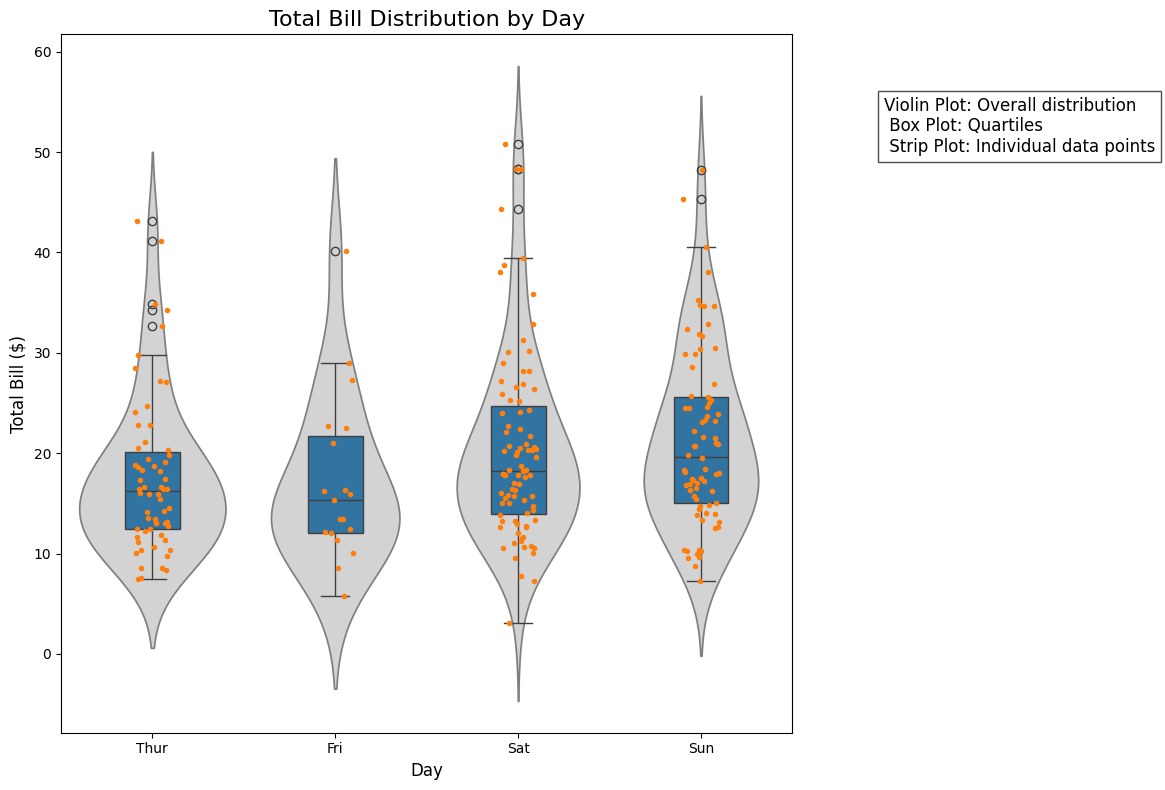

In [14]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Create a violin plot
sns.violinplot(data=df, x="day", y="total_bill", inner=None, ax=ax, color="lightgray")

# Add a box plot on top of the violin plot
sns.boxplot(data=df, x="day", y="total_bill", width=0.3, ax=ax, boxprops={"zorder": 2})

# Add a strip plot on top of both
sns.stripplot(data=df, x="day", y="total_bill", size=4, jitter=True, ax=ax, zorder=3)

# Customize the plot
ax.set_title("Total Bill Distribution by Day", fontsize=16)
ax.set_xlabel("Day", fontsize=12)
ax.set_ylabel("Total Bill ($)", fontsize=12)

# Add a text annotation
ax.text(4, 
        50, 
        "Violin Plot: Overall distribution \n Box Plot: Quartiles \n Strip Plot: Individual data points",
        fontsize=12, 
        bbox=dict(facecolor='white', alpha=0.7)
       )

plt.tight_layout()
plt.show()

## Advanced Customization

You can use Matplotlib's advanced customization options to create highly customized plots.

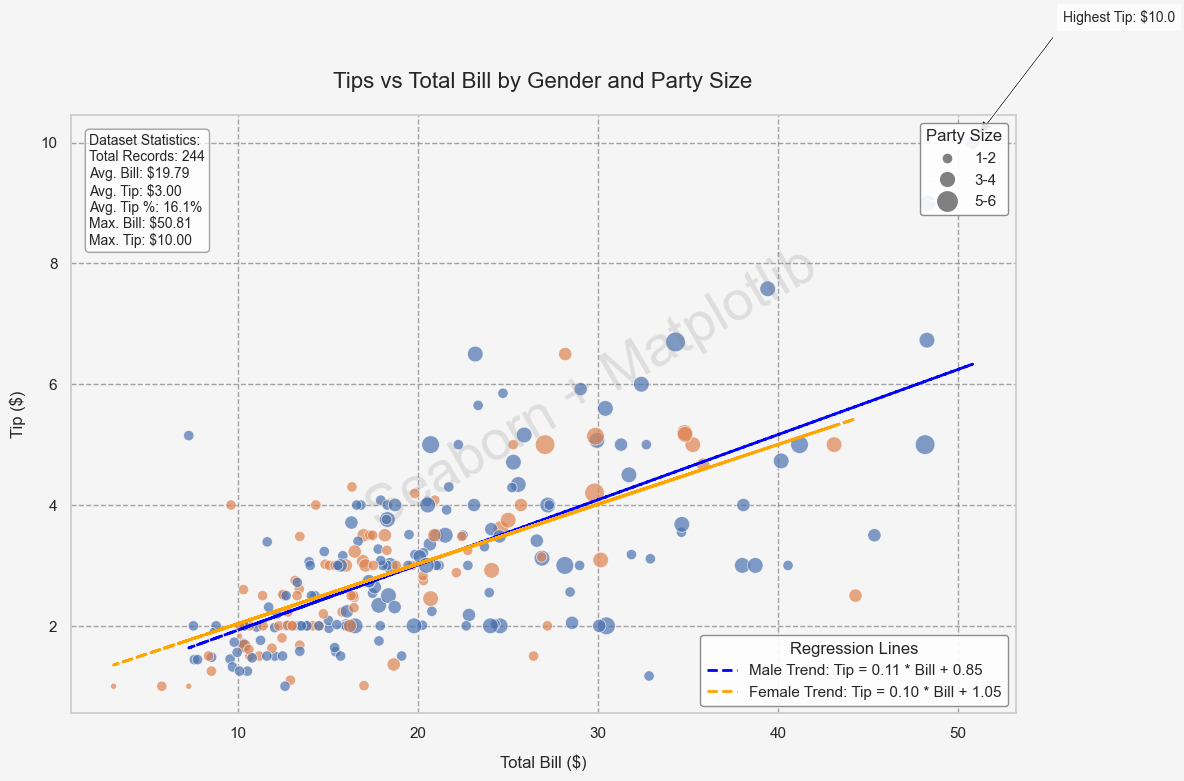

In [17]:
# Set Seaborn style
sns.set(style="whitegrid")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8), facecolor='#f5f5f5')
ax.set_facecolor('#f5f5f5')

# Create a scatter plot
scatter = sns.scatterplot(
    data=df,
    x="total_bill",
    y="tip",
    hue="sex",
    size="size",
    sizes=(20, 200),
    alpha=0.7,
    ax=ax
)

# Title and labels
ax.set_title("Tips vs Total Bill by Gender and Party Size", fontsize=16, pad=20)
ax.set_xlabel("Total Bill ($)", fontsize=12, labelpad=10)
ax.set_ylabel("Tip ($)", fontsize=12, labelpad=10)

# Grid style
ax.grid(True, linestyle='--', alpha=0.7, color='gray')

# Custom legend for party size
size_legend = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=8, label='1-2'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=12, label='3-4'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=16, label='5-6'),
]
legend1 = ax.legend(
    handles=size_legend,
    title="Party Size",
    loc="upper right",
    frameon=True,
    framealpha=0.9,
    edgecolor='gray'
)
ax.add_artist(legend1)

# Add regression lines per gender (with validation)
trend_legend = []
trend_labels = []
colors = {'Male': 'blue', 'Female': 'orange'}
for gender in ['Male', 'Female']:
    subset = df[df['sex'] == gender]
    if not subset.empty:
        x = subset['total_bill']
        y = subset['tip']
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        ax.plot(x, p(x), color=colors[gender], linestyle='--', linewidth=2)
        trend_legend.append(Line2D([0], [0], color=colors[gender], linestyle='--', linewidth=2))
        trend_labels.append(f"{gender} Trend: Tip = {z[0]:.2f} * Bill + {z[1]:.2f}")

# Add regression legend
ax.legend(
    handles=trend_legend,
    labels=trend_labels,
    title="Regression Lines",
    loc="lower right",
    frameon=True,
    framealpha=0.9,
    edgecolor='gray'
)

# Annotate highest tip
max_tip_row = df.loc[df['tip'].idxmax()]
ax.annotate(
    f"Highest Tip: ${max_tip_row['tip']}",
    xy=(max_tip_row['total_bill'], max_tip_row['tip']),
    xytext=(max_tip_row['total_bill']+5, max_tip_row['tip']+2),
    arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
    fontsize=10,
    bbox=dict(facecolor='white', alpha=0.7)
)

# Add text box with summary stats
stats_text = (
    f"Dataset Statistics:\n"
    f"Total Records: {len(df)}\n"
    f"Avg. Bill: ${df['total_bill'].mean():.2f}\n"
    f"Avg. Tip: ${df['tip'].mean():.2f}\n"
    f"Avg. Tip %: {(df['tip'] / df['total_bill']).mean() * 100:.1f}%\n"
    f"Max. Bill: ${df['total_bill'].max():.2f}\n"
    f"Max. Tip: ${df['tip'].max():.2f}"
)
props = dict(boxstyle='round', facecolor='white', alpha=0.7, edgecolor='gray')
ax.text(0.02, 0.97, stats_text, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

# Add watermark
fig.text(0.5, 0.5, "Seaborn + Matplotlib", fontsize=40, color='gray',
         ha='center', va='center', alpha=0.2, rotation=30)

plt.tight_layout()
plt.show()

## Saving Plots

You can save your plots using Matplotlib's `savefig` function.

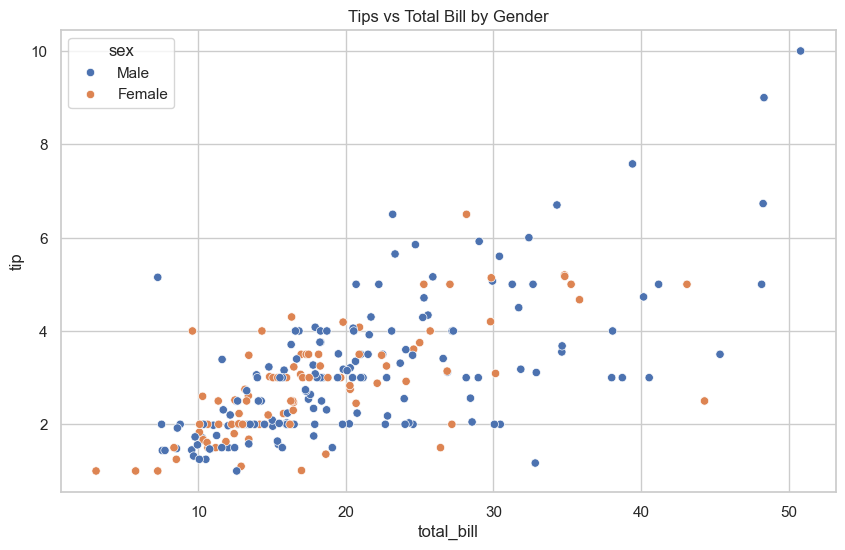

In [18]:
# Create a simple plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="total_bill", y="tip", hue="sex")
plt.title("Tips vs Total Bill by Gender")

# Save the plot in different formats and resolutions
# Note: In a Jupyter notebook, this will save the files in the same directory as the notebook

# Save as PNG with 300 DPI (good for web)
plt.savefig("tips_scatter_300dpi.png", dpi=300, bbox_inches='tight')

# Save as PDF (vector format, good for publications)
plt.savefig("tips_scatter.pdf", bbox_inches='tight')

# Save as SVG (vector format, good for further editing)
plt.savefig("tips_scatter.svg", bbox_inches='tight')

plt.show()

## Conclusion

This notebook has demonstrated how Seaborn integrates with Matplotlib, allowing you to create beautiful and informative visualizations by combining the high-level interface of Seaborn with the flexibility and customization options of Matplotlib. Some key points to remember:

1. Seaborn functions return Matplotlib axes objects, which can be further customized.
2. You can create Matplotlib figure and axes objects first, and then pass them to Seaborn functions.
3. You can create complex layouts using Matplotlib's subplots and GridSpec.
4. Seaborn provides specialized multi-panel plotting tools like FacetGrid and PairGrid.
5. You can combine different types of plots on the same axes.
6. You can use Matplotlib's advanced customization options to create highly customized plots.
7. You can save your plots in various formats using Matplotlib's `savefig` function.